In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import pandas as pd
import matplotlib.pyplot as plt
import re

In [24]:
data = pd.read_csv('C:\\Users\\Admin\\Documents\\progs\\playstore\\googleplaystore.csv')
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data = data.dropna()
data['Reviews'] = data.Reviews.astype('int64')
for i, row in data.iterrows():
    data.at[i,'Installs'] = re.sub('\D', '', row['Installs'])
data['Installs'] = pd.to_numeric(data['Installs'])

In [3]:
data_r = data[['Reviews', 'Rating']].groupby('Rating').sum()

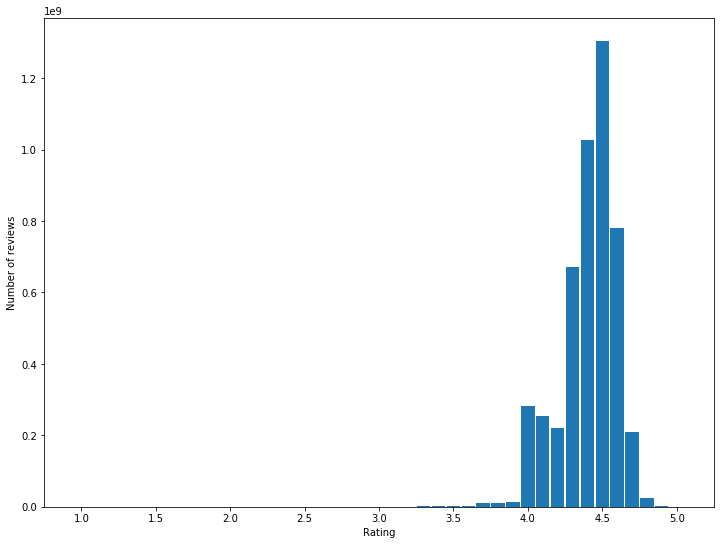

In [4]:
plt.bar(data_r.index.values, data_r['Reviews'], width=0.09)
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.show()

In [5]:
#По графику мы видим, что подавляющее большинство оценок приходится на приложения на 4-4,5 балла. Приложения,
#которые в среднем получают меньше 4 баллов практически не оценивают.

In [6]:
data_r = data[['Genres']+['Installs']].groupby('Genres').aggregate(['sum', 'count'])
sumplot = data_r['Installs'].nlargest(10,'sum')
countplot = data_r['Installs'].nlargest(10,'count')
countplot


,sum,count
Genres,,
Tools,11440224500,732
Entertainment,5064124820,533
Education,500767210,468
Action,9342037470,358
Productivity,14176070180,351
Medical,53205576,350
Sports,2867131465,333
Communication,32647241530,328
Finance,876612400,323


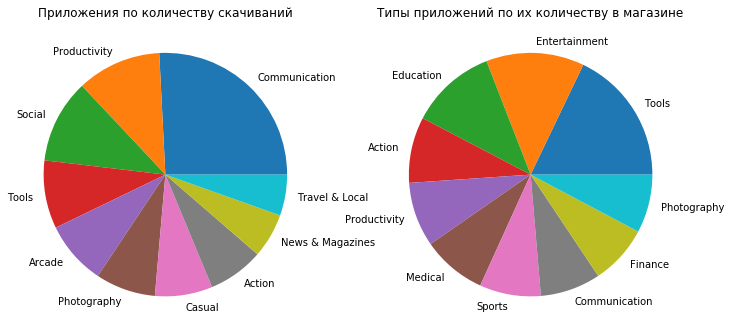

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(sumplot['sum'], labels=sumplot.index)
ax2.pie(countplot['count'], labels=countplot.index)
ax1.set_title(label='Приложения по количеству скачиваний')
ax2.set_title(label='Типы приложений по их количеству в магазине')
# plt.pie(data_r['Installs']['sum'], labels=data_r.index)
plt.show()

In [8]:
#Здесь мы можем увидеть, что графики заметно различаются. Приложений для общения не так много, но они занимают
#существенную долю по количеству установок. Приложения для рязвлечений и образования находятся на 2 и 3 местах
#по количеству, но по скачиваниям их нет даже в десятке.

In [9]:
import seaborn as sns

In [10]:
import sqlite3

In [11]:
con = sqlite3.connect("football/players.sqlite")
df = pd.read_sql_query("SELECT * from Player", con)
con.close()

In [12]:
for i, row in df.iterrows():
    df.at[i,'birthday'] = int(row['birthday'][0:4])

In [13]:
df['height'] = df.height.astype('int64')

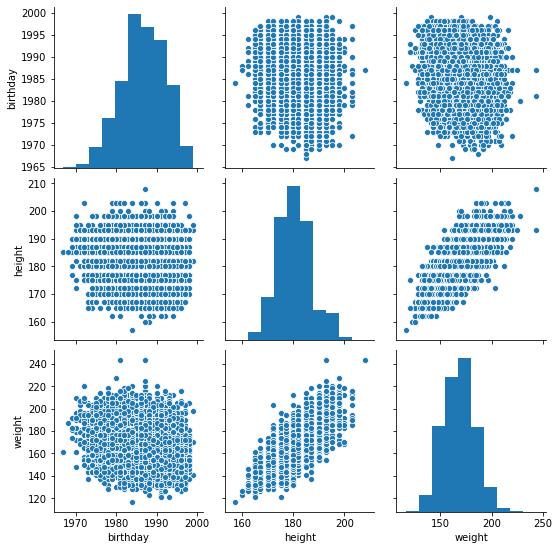

In [14]:
sns_plot = sns.pairplot(df[['birthday', 'height', 'weight']])
sns_plot

In [15]:
#Между молодыми футболистами и старшими практически нет разницы в росте. Зато видно, что футболисты родившиеся в 70-х
#сейчас гораздо тяжелее, чем футболисты, родившиеся в 90-х. Может, это связано с диетами, а может и с отбором
#футболистов тогда и сейчас. Средний современный футболист европейских лиг родился в 80-е, его рост около 180 см, а вес - около
#180 фунтов(80 килограммов). Также легковесных и низких футболистов больше, чем тяжеловесных и высоких.

In [16]:
con = sqlite3.connect("football/players.sqlite")
df = pd.read_sql_query("SELECT * from Player_Attributes", con)
con.close()

In [17]:
df = df.dropna()
df['overall_rating'] = df.overall_rating.astype('int64')
df['potential'] = df.potential.astype('int64')
df1 = df['overall_rating'].value_counts()
df2 = df['potential'].value_counts()

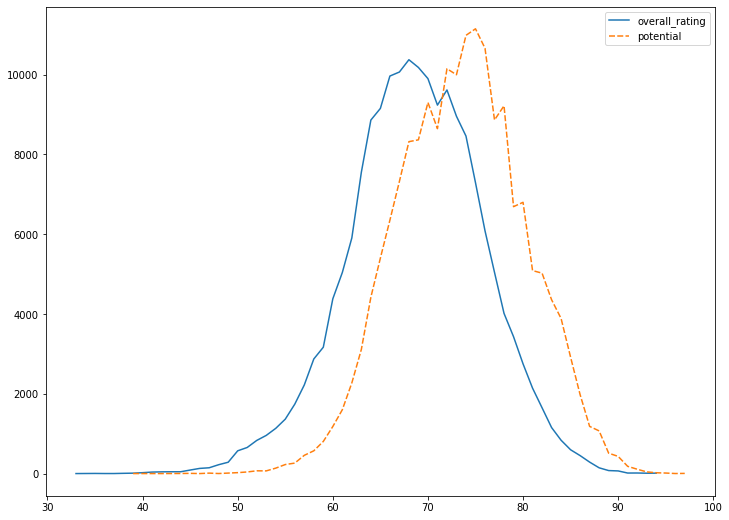

In [18]:
ax = sns.lineplot(data=[df1,df2])

In [19]:
#Это график, который показывает, как оценивают уровень игроков и их потенциал развития в игре FIFA. Видно, что средний
#футболист обладает рейтингом около 70, но может развиться до 80. Также видно, что рейтинг вычисляли по некой формуле, а
#потенциал скорее всего записывали руками, на это указывают провалы и пики на определенных числах, тогда как
#у рейтингов практически ровный график

In [23]:
df = pd.read_csv('C:\\Users\\Admin\\Documents\\progs\\music\\top50.csv', encoding = 'ISO-8859-1')

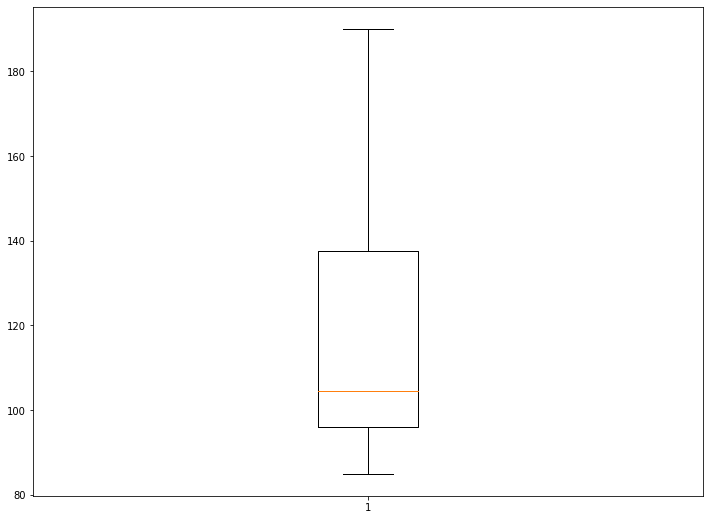

In [21]:
plt.boxplot(df['Beats.Per.Minute'])
plt.show()

In [22]:
#Большинство музыкальных произведений из топа по прослушиваниям находятся в районе 100 BPM, что считается
#довольно медленным темпом